In [2]:
import pickle
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

In [11]:
def plot_feature_importance(importance,names,model,palette):
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    
    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    feature_importance_df = pd.DataFrame(data)
    #Sort the DataFrame in order decreasing feature importance
    feature_importance_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
   
    #Define size of bar plot
    plt.figure(figsize=(10,6))
    #Plot Searborn bar chart
    
    sns.barplot(x=feature_importance_df['feature_importance'], y=feature_importance_df['feature_names'], palette=palette)
    #Add chart labels
    plt.title(model + ' RF Feature Importance')
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature Names')
    # plt.savefig('MCI_FeatureImportance.png', bbox_inches="tight")

In [4]:
def top_features(rf, X_train,model, palette):
    importances = rf.feature_importances_
    important_features = np.sort(importances)[:10]
    indices = np.argsort(importances)
    X_train.columns[indices[-10:]]

    importances = rf.feature_importances_
    indices = np.argsort(importances)

    plot_feature_importance(importances[indices[-10:]], X_train.columns[indices[-10:]], model, palette)    

In [7]:
rf, X_train, X_test, y_train, y_test = pickle.load(open('AD_NC/models/ADNI_AD_NC', 'rb'))
feature_list = X_train.columns.values.tolist()

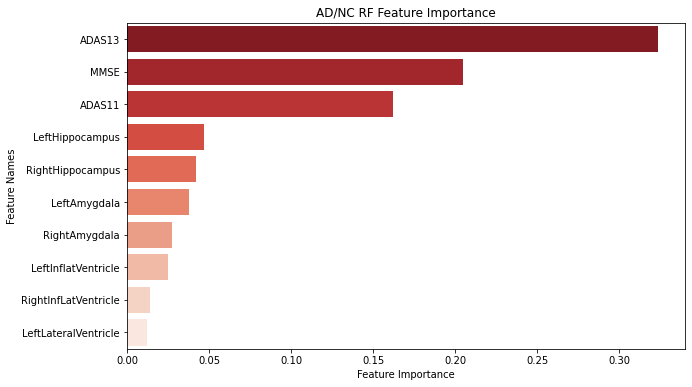

In [10]:
top_features(rf, X_train, 'AD/NC', sns.color_palette("Reds_r", 10))

In [13]:
rf, X_train, X_test, y_train, y_test = pickle.load(open('MCI_NC/models/ADNI_MCI_NC', 'rb'))
feature_list = X_train.columns.values.tolist()

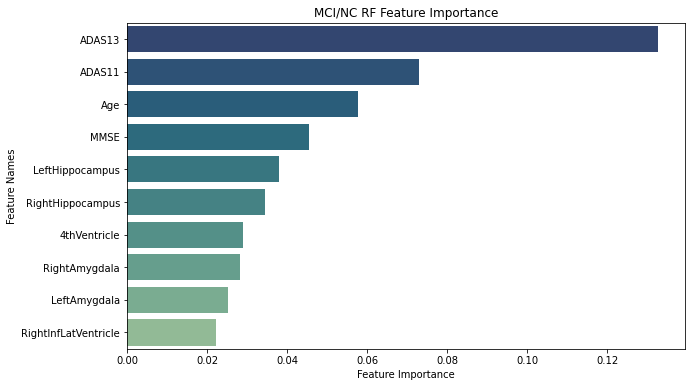

In [14]:
top_features(rf, X_train, 'MCI/NC', sns.color_palette("crest_r", 10))